## Mice protien expression

## Task 1: Retrieving and Preparing the Data

# Data Description

The dataset contains expression levels of 77 proteins measured in the cerebral cortex of eight classes of mice.The 8 classes of mice are divided based on genotype,behaviour and treatment. The dataset is available to the public and it consists of a total of 1080 measurements per protein.The dataset has 82 columns and 1080 rows.The dataset is downloaded from https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression. The target feature is the class.So the impact of each type of protein is used to determine the class of mice.

# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the data
df=pd.read_csv("Data_Cortex_Nuclear.csv")
#To view the dataset
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


ID like Column is present in the dataset here it is the MouseID, it has unique values for each and very row.This is not neededin predictive modelling so this is dropped as it is of no use during prediction.

In [3]:
df=df.drop('MouseID',axis=1)
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [4]:
#checking the shape
df.shape

(1080, 81)

In [5]:
#checking the attribute types
df.dtypes

DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
NR2A_N       float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 81, dtype: object

Checking for Missing Values in each columns

In [6]:
df.isna().sum()

DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
NR2A_N       3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 81, dtype: int64

Display all the columns which have null value:

In [7]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

DYRK1A_N        3
ITSN1_N         3
BDNF_N          3
NR1_N           3
NR2A_N          3
pAKT_N          3
pBRAF_N         3
pCAMKII_N       3
pCREB_N         3
pELK_N          3
pERK_N          3
pJNK_N          3
PKCA_N          3
pMEK_N          3
pNR1_N          3
pNR2A_N         3
pNR2B_N         3
pPKCAB_N        3
pRSK_N          3
AKT_N           3
BRAF_N          3
CAMKII_N        3
CREB_N          3
ELK_N          18
ERK_N           3
GSK3B_N         3
JNK_N           3
MEK_N           7
TRKA_N          3
RSK_N           3
APP_N           3
Bcatenin_N     18
SOD1_N          3
MTOR_N          3
P38_N           3
pMTOR_N         3
DSCR1_N         3
AMPKA_N         3
NR2B_N          3
pNUMB_N         3
RAPTOR_N        3
TIAM1_N         3
pP70S6_N        3
BAD_N         213
BCL2_N        285
pCFOS_N        75
H3AcK18_N     180
EGR1_N        210
H3MeK4_N      270
dtype: int64

Return every row that contains at least one null value

In [8]:
df[df.isnull().any(axis=1)][null_columns]

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,BAD_N,BCL2_N,pCFOS_N,H3AcK18_N,EGR1_N,H3MeK4_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.394721,0.339571,0.482864,0.294170,0.122652,NaN,0.108336,0.114783,0.131790,0.128186
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.368255,0.321959,0.454519,0.276431,0.116682,NaN,0.104315,0.111974,0.135103,0.131119
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.363880,0.313086,0.447197,0.256648,0.118508,NaN,0.106219,0.111883,0.133362,0.127431
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.366771,0.328492,0.442650,0.398534,0.132781,NaN,0.111262,0.130405,0.147444,0.146901
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.351551,0.312206,0.419095,0.393447,0.129954,NaN,0.110694,0.118481,0.140314,0.148380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.260516,0.239130,0.340756,0.527041,0.190483,NaN,0.183324,0.318782,0.204660,0.328327
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.275837,0.235080,0.346252,0.518377,0.190463,NaN,0.175674,0.325639,0.200415,0.293435
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.235239,0.231876,0.292788,0.460202,0.216682,NaN,0.158296,0.321306,0.229193,0.355213
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.258475,0.215951,0.301587,0.490496,0.222263,NaN,0.196296,0.335936,0.251317,0.365353


Imputing the null values with the mean:

In [9]:
for i in range(len(null_columns)):
    df[null_columns[i]].fillna(df[null_columns[i]].mean(), inplace=True)

In [10]:
#Check if there are any any values present
null_columns_impute=df.columns[df.isnull().any()]
df[null_columns_impute].isnull().sum()

Series([], dtype: float64)

In [11]:
df[df.isnull().any(axis=1)][null_columns_impute]

""


In [12]:
#Missing value issue is solved
df.isna().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 81, dtype: int64

# Redundant Features

In [13]:
#Checking the categorical columns in the dataset
cat_cols = df.columns[df.dtypes == np.object].tolist()
cat_cols

['Genotype', 'Treatment', 'Behavior', 'class']

In [14]:
df['Genotype'].value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

In [15]:
df['Treatment'].value_counts()

Memantine    570
Saline       510
Name: Treatment, dtype: int64

In [16]:
df['Behavior'].value_counts()

S/C    555
C/S    525
Name: Behavior, dtype: int64

In [17]:
df['class'].value_counts()

c-SC-m    150
c-CS-m    150
c-CS-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
c-SC-s    135
t-CS-s    105
Name: class, dtype: int64

Classes: 
c-CS-s: control mice, stimulated to learn, injected with saline (9 mice) 
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice) 
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice) 
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice) 

t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice) 
t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice) 
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice) 
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice) 

The class feature gives information that is provided in the feature 'Genotype' , 'Treatment' and 'Behavior.
So these featureas can be removed.


In [18]:
df_clean=df.drop('Genotype',axis=1)
df_clean=df_clean.drop('Treatment',axis=1)
df_clean=df_clean.drop('Behavior',axis=1)

Check if columns are duplicated in the dataset

In [19]:
#Check if columns are duplicated

def duplicate(dataframe):
    '''
    A list of duplicated columns is gotten from the dataframe
    As it will iterate over each and very column and compare and find the columns which is duplicated
    It returns the duplicated column which is present at (x+1)th index
    
    '''
    duplicateColumnNames = set()
    
    # Iterate over the columns in dataframe
    for x in range(dataframe.shape[1]):
        # Select column at xth index.
        col = dataframe.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, dataframe.shape[1]):
            # Select column at yth index.
            otherCol = dataframe.iloc[:, y]
            
            # Check if two columns at x and y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(dataframe.columns.values[y])
    return list(duplicateColumnNames)

# Get list of duplicate columns
duplicateColumnNames = duplicate(df_clean)


 
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)
    



Duplicate Columns are as follows
Column name :  pS6_N


The duplicated columns is present pS6_N is duplicated so it is dropped.A descriptive feature is "redundant" if it conveys the same information as another feature. So it is dropped.

In [20]:
df_clean=df_clean.drop('pS6_N',axis=1)

In [21]:
df_clean.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.134762,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.134762,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.134762,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.134762,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.134762,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,c-CS-m


# Task 2: Data Exploration

In [22]:
df_clean.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.848767,0.226676,0.157914,0.134762,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249015,0.251290,0.049314,0.346810,0.931802,0.041577,0.027004,1.293368,0.032542,0.466254,...,0.094311,0.028989,0.026461,0.023519,0.023018,0.066432,0.054222,0.036261,0.048069,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.577397,0.155869,0.088305,0.080657,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.160287,0.205821,0.164619,2.479861,0.190828,1.206389,...,0.793739,0.206395,0.141045,0.119986,0.114373,0.398082,0.133969,0.159168,0.174271,1.081423
50%,0.366540,0.566365,0.316703,2.297269,3.763306,0.231246,0.182270,3.329624,0.210681,1.356368,...,0.849858,0.224000,0.157914,0.134762,0.128466,0.448459,0.169609,0.183135,0.205440,1.317441
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197226,4.480652,0.234558,1.560931,...,0.916173,0.241655,0.167584,0.139331,0.142427,0.490773,0.187174,0.196133,0.219242,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,1.204598,0.358289,0.282016,0.261506,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


# DYRK1A_N column

The DYRK1A_N protein feature has all unique values .A box plot is plotted to represent the set of the numerical values through the quantiles. By observing the below box plot there are many outliers present. But since all these outliers are unique values so they are not removed as useful information can be lost . As  the impact of each type of protein is used to determine the class of mice. From the box plot of DYRK1A_N distribution, it can be observed is skewed towards smaller values. Histogram is utilised to group the data in bins .From the shape of the bin, it is observed that the data is exponential distribution.

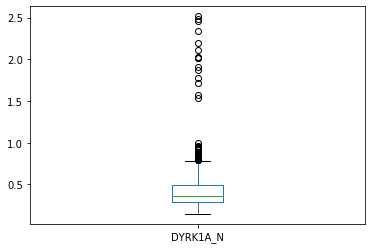

In [23]:
df_clean['DYRK1A_N'].dropna().plot(kind='box')
plt.show()

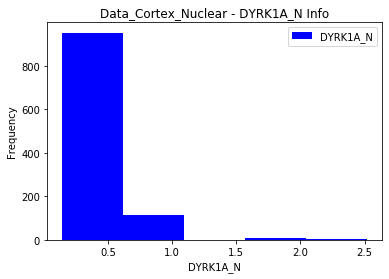

In [24]:
df_clean['DYRK1A_N'].plot(kind='hist', bins = 5,color='blue')
plt.title('Data_Cortex_Nuclear - DYRK1A_N Info')
plt.xlabel('DYRK1A_N')
plt.legend()



# ITSN1_N column

The ITSN1_N column have unique values. A box plot is plotted to visualize the data. There are many outliers present in the feature. From the box plot of ITSN1_N distribution, it can be observed it is skewed towards smaller values. By observing the histogram, it is found that the data is exponentially distributed.

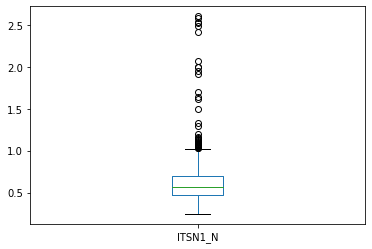

In [25]:
df_clean['ITSN1_N'].dropna().plot(kind='box')
plt.show()

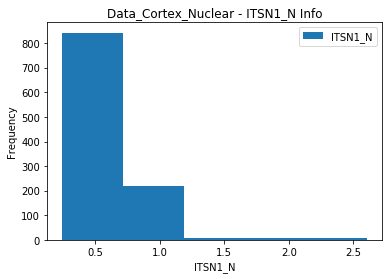

In [26]:
df_clean['ITSN1_N'].plot(kind='hist', bins = 5)
plt.title('Data_Cortex_Nuclear - ITSN1_N Info')
plt.xlabel('ITSN1_N')
plt.legend()

# BDNF_N

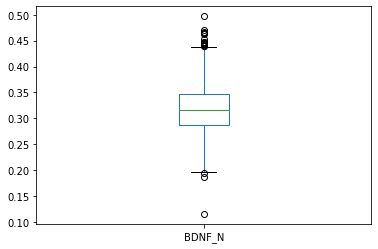

In [27]:
df_clean['BDNF_N'].dropna().plot(kind='box')
plt.show()

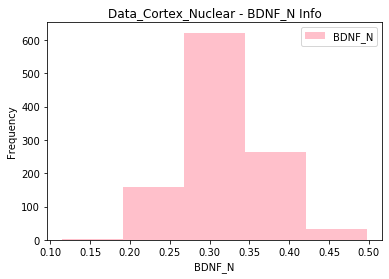

In [28]:

df_clean['BDNF_N'].plot(kind='hist', bins = 5,color='pink')
plt.title('Data_Cortex_Nuclear - BDNF_N Info')
plt.xlabel('BDNF_N')
plt.legend()

# NR1_N

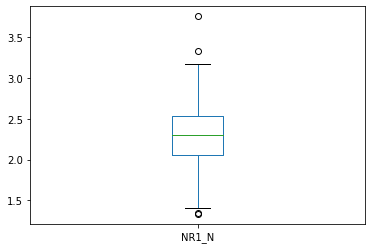

In [29]:
df_clean['NR1_N'].dropna().plot(kind='box')
plt.show()

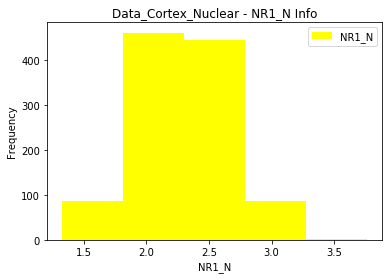

In [30]:
df_clean['NR1_N'].plot(kind='hist', bins = 5,color='yellow')
plt.title('Data_Cortex_Nuclear - NR1_N Info')
plt.xlabel('NR1_N')
plt.legend()

# NR2A_N

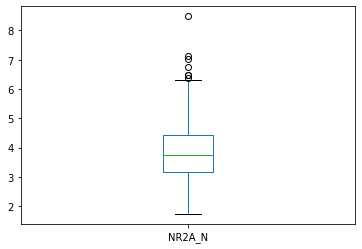

In [31]:
df_clean['NR2A_N'].dropna().plot(kind='box')
plt.show()

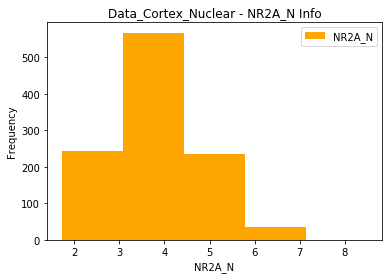

In [32]:
df_clean['NR2A_N'].plot(kind='hist', bins = 5,color='orange')
plt.title('Data_Cortex_Nuclear - NR2A_N Info')
plt.xlabel('NR2A_N')
plt.legend()

# pAKT_N

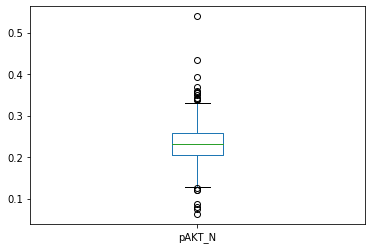

In [33]:
df_clean['pAKT_N'].dropna().plot(kind='box')
plt.show()

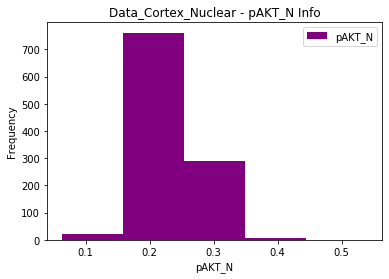

In [34]:
df_clean['pAKT_N'].plot(kind='hist', bins = 5,color='purple')
plt.title('Data_Cortex_Nuclear - pAKT_N Info')
plt.xlabel('pAKT_N')
plt.legend()

# pBRAF_N

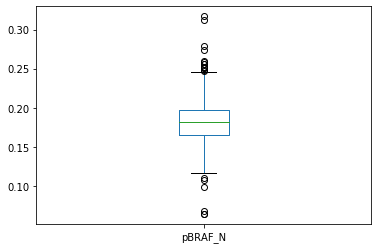

In [35]:
df_clean['pBRAF_N'].dropna().plot(kind='box')
plt.show()

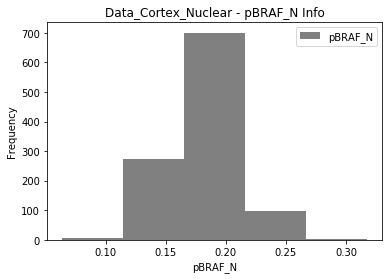

In [36]:
df_clean['pBRAF_N'].plot(kind='hist', bins = 5,color='grey')
plt.title('Data_Cortex_Nuclear - pBRAF_N Info')
plt.xlabel('pBRAF_N')
plt.legend()


# pCAMKII_N

The pCAMKII _N protein feature has all unique values .A box plot is plotted to represent the set of the numerical values through the quantiles. By observing the below box plot there are no outliers present.
From the box plot of pCAMKII _N distribution, it can be observed is skewed towards smaller values.
Histogram is utilised to group the data in bins .From the shape of the bin, it is observed that the data is exponential distribution.


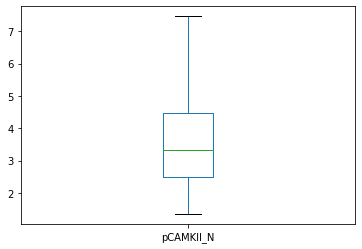

In [37]:
df_clean['pCAMKII_N'].dropna().plot(kind='box')
plt.show()

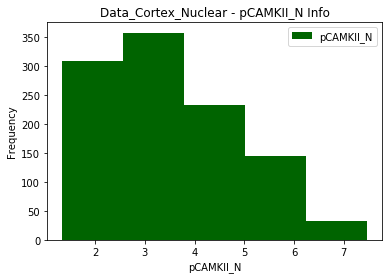

In [38]:
df_clean['pCAMKII_N'].plot(kind='hist', bins = 5,color='darkgreen')
plt.title('Data_Cortex_Nuclear - pCAMKII_N Info')
plt.xlabel('pCAMKII_N')
plt.legend()

# pCREB_N

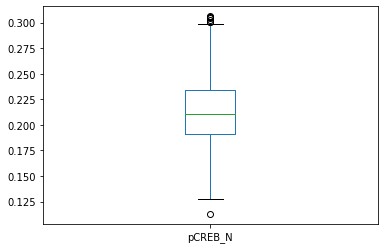

In [39]:
df_clean['pCREB_N'].dropna().plot(kind='box')
plt.show()

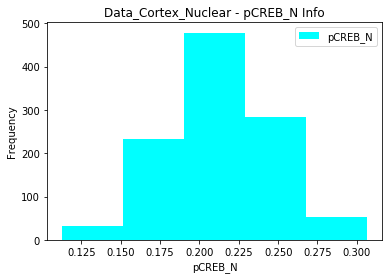

In [40]:
df_clean['pCREB_N'].plot(kind='hist', bins = 5,color='cyan')
plt.title('Data_Cortex_Nuclear - pCREB_N Info')
plt.xlabel('pCREB_N')
plt.legend()

# pELK_N

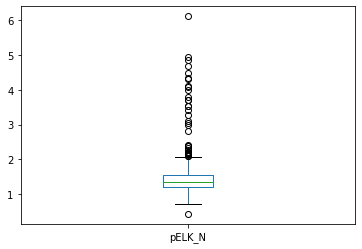

In [41]:
df_clean['pELK_N'].dropna().plot(kind='box')
plt.show()



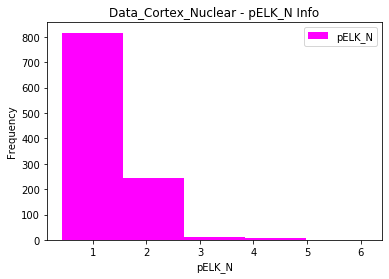

In [42]:
df_clean['pELK_N'].plot(kind='hist', bins = 5,color='magenta')
plt.title('Data_Cortex_Nuclear - pELK_N Info')
plt.xlabel('pELK_N')
plt.legend()



# Exploring the relationship between pairs of attribute:

# 1.Genotype and Treatment:

According to the genotype feature, the mice can be control or trisomic.And the mice have undergone treatment , they have been druged either with memantine or saline.

Hypothesis:
    The mice which are of the the genotype control , are equally injected with either memantine or saline.

In [43]:
df['Genotype'].value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

In [44]:
df['Treatment'].value_counts()

Memantine    570
Saline       510
Name: Treatment, dtype: int64

In [45]:
#Get the controlled mice
genotype_control=df['Genotype'] == 'Control'
genotype_control.value_counts()

True     570
False    510
Name: Genotype, dtype: int64

In [46]:
#To check the control mice have undergone which treatment
genotype_control_treatment=df.loc[genotype_control, 'Treatment'].value_counts()
genotype_control_treatment

Memantine    300
Saline       270
Name: Treatment, dtype: int64

Text(0, 0.5, 'Treatment of mice under control genotype ')

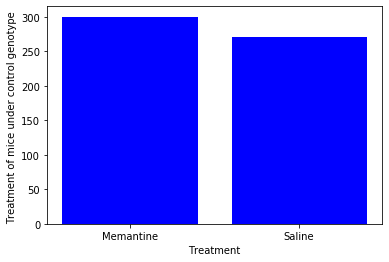

In [47]:
plt.bar(list(range(2)), genotype_control_treatment , color='b', align='center')
plt.xticks(list(range(2)),['Memantine','Saline'])
plt.xlabel('Treatment')
plt.ylabel('Treatment of mice under control genotype ')

According to the plot above, the mice are not equally treated with the drugs memantine and saline. The controlled mice are not equally treated with the drugs.The controlled mice are slightly more treated with memantine.So the hypothesis is not true.

# 2.Genotype and Behavior :

According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context).

Hypothesis:The mice which belong to control genotype are equally been divided into two groups and one group have been stimulated to learn and other group have not been stimulated.

In [48]:
df['Behavior'].value_counts()

S/C    555
C/S    525
Name: Behavior, dtype: int64

In [49]:
#mice of only control genotype
genotype_control=df['Genotype'] == 'Control'
genotype_control.value_counts()

True     570
False    510
Name: Genotype, dtype: int64

In [50]:
#mice of genotype control divided based on the behavior
genotype_control_Behavior=df.loc[genotype_control, 'Behavior'].value_counts()
genotype_control_Behavior

C/S    285
S/C    285
Name: Behavior, dtype: int64

Text(0, 0.5, 'Behavior of mice under control genotype ')

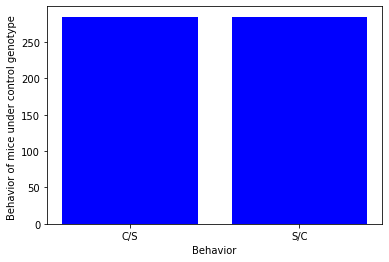

In [51]:
plt.bar(list(range(2)), genotype_control_Behavior , color='b', align='center')
plt.xticks(list(range(2)),['C/S','S/C'])
plt.xlabel('Behavior')
plt.ylabel('Behavior of mice under control genotype ')

From the above plot, the hypothesis is true .As mice of control genotype have been divided equally.So the number of control mice which have been stimulated to learn is equal to the mice which have not been stimulated. 

# 3.Treatment and Behavior:

Hypothesis:

The mice which underwent memantine treatment have equally been split into two groups and one group have been stimulated to learn and other group have not been stimulated.

In [52]:
#mice which underwent memantine treatment
Treatment_memantine=df['Treatment'] == 'Memantine'
Treatment_memantine.value_counts()

True     570
False    510
Name: Treatment, dtype: int64

In [53]:
Treatment_memantine_Behavior=df.loc[Treatment_memantine, 'Behavior'].value_counts()
Treatment_memantine_Behavior

C/S    285
S/C    285
Name: Behavior, dtype: int64

Text(0, 0.5, 'Behavior of mice under Memantine treatment ')

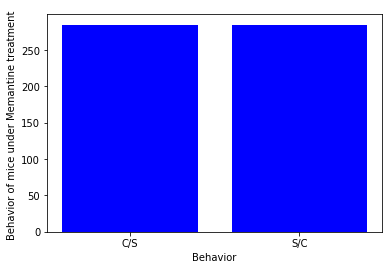

In [54]:
plt.bar(list(range(2)), Treatment_memantine_Behavior , color='b', align='center')
plt.xticks(list(range(2)),['C/S','S/C'])
plt.xlabel('Behavior')
plt.ylabel('Behavior of mice under Memantine treatment ')

The plausible hypothesis stands true, from the above plot.The mice which underwent memantine treatment have equally been split into two groups and one group have been stimulated to learn and other group have not been stimulated.

# 4.DYRK1A_N and Genotype:

The protein DYRK1A_N how it discriminates between the genotype.

Hypothesis:
    The protein DYRK1A_N will effect differently between the two genotypes and there will be significant difference on how it effects.


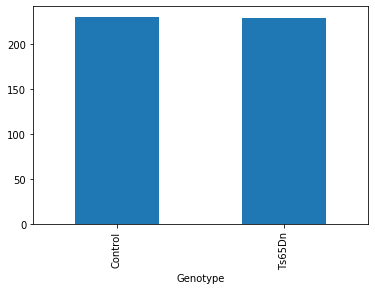

In [55]:
df['DYRK1A_N'].groupby(df['Genotype']).sum().plot.bar()

According to the plot, the hypothesis fails , as there is no difference between the two genotype.

# 5.CaNA_N and class
 
 
Hypothesis:

The protein CaNA_N will effect each class of mice differently.


In [56]:
df['class'].value_counts()

c-SC-m    150
c-CS-m    150
c-CS-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
c-SC-s    135
t-CS-s    105
Name: class, dtype: int64

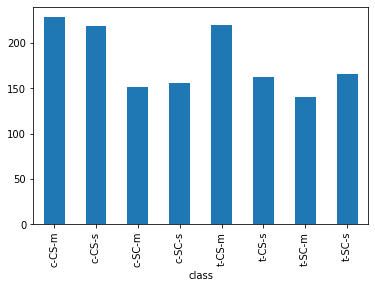

In [57]:
df['CaNA_N'].groupby(df['class']).sum().plot.bar()


The pausible hypothesis is true, as the protein effects each class differently. 

From the graph, it can be observed that c-CS-m and c-CS-s have slight difference. And also c-SC-m and c-SC-s are almost equal.

# 6.CaNA_N and genotype:
    
It was observed that the protein DYRK1A_N effects the  control mice and  trisomic mice equally. So check other proteins like CaNA_N.

Hypothesis:
CaNA_N protein will effect both the genotype equally.

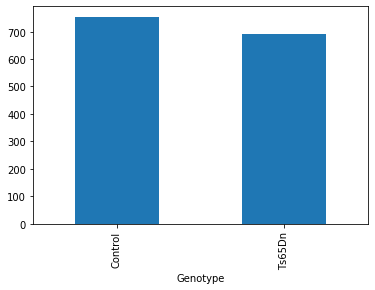

In [58]:
df['CaNA_N'].groupby(df['Genotype']).sum().plot.bar()

According to the plot, there is a difference on the effet of the protein CaNA_N on both the genotypes unlike the protein DYRK1A_N. So the hypothesis is rejected.

# 7.CaNA_N and Behavior

Hypothesis:
    The protein CaNA_N has more effect on the mice which have been stimulate to learn when compared to the mice which have not been stimulated.



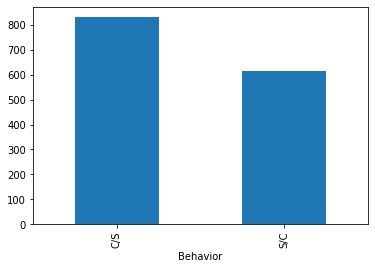

In [59]:
df['CaNA_N'].groupby(df['Behavior']).sum().plot.bar()

From the above plot, the hypothesis is true as the protein CaNA_N effects more on the mic ehich have been stimulated to learn

# 8.CaNA_N and Treatment:
    
Hypothesis:
    The protein CaNA_N has more effect on the mice which have undergone memantine treatment.
    

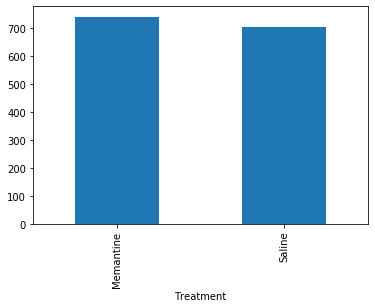

In [60]:
df['CaNA_N'].groupby(df['Treatment']).sum().plot.bar()

From the above plot, the hypothesis is true. As the protein CaNA_N, has more effect on mice which underwent memantine treatment.

# 9.DYRK1A_N and Behavior:

Hypothesis:
    The protein DYRK1A_N effects differently on the mice of different behavior.

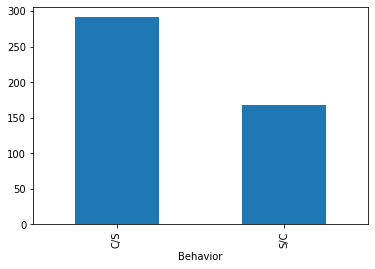

In [61]:
df['DYRK1A_N'].groupby(df['Behavior']).sum().plot.bar()

The hypothesis is true.From the plot it can observed that the protein DYRK1A_N effects differently on the mice which have been stimulated to learn and other group have not been stimulated.It effects more on the group which have been stimulated to learn.

# 10.DYRK1A_N and class:

Hypothesis : 
    The protein DYRK1A_N effects the classes of same behavior in the same manner.

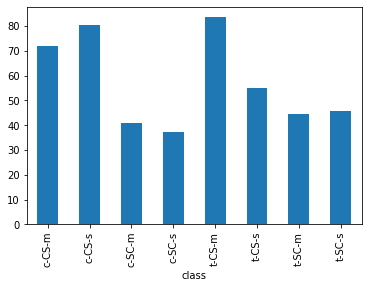

In [62]:
df['DYRK1A_N'].groupby(df['class']).sum().plot.bar()

The effect of protein DYRK1A_N is higher in class t-CS-m and lowest in c-SC-s.So it effects each of the 6 class differently.Hence the hypothesis is not true.

## Task 3: Data Modelling

Partitioning Dataset into the Set of Descriptive Features and the Target Feature

In [63]:
Data_df = df_clean.drop(columns = 'class')
Data=Data_df.values
target = df_clean['class']

In [64]:
target_names=target.unique().tolist()

# Encoding Target:
    
The target is converted to 0,1,2,3,4,5,6 using labelEncoder.



0 = c-CS-m

1 = c-CS-s

2 = c-SC-m

3 = c-SC-s

4 = t-CS-m

5 = t-CS-s

6 = t-SC-m

7 = t-SC-s

In [65]:
from sklearn import preprocessing

target_encoded = preprocessing.LabelEncoder().fit_transform(target)

In [66]:
np.unique(target_encoded, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([150, 135, 150, 135, 135, 105, 135, 135], dtype=int64))

# Feature Selection

Feature Selection Using Random Forest Importance performed.The random forest importance (RFI) method is a filter feature selection method.

RFI feature is performed for 100 trees

In [67]:
from sklearn.ensemble import RandomForestClassifier
#15 best features are selected
features = 15
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(Data_df, df_clean['class'])
fs_indices = np.argsort(rf_model.feature_importances_)[::-1][0:features]
#best feature is selected
best_fetaure = Data_df.columns[fs_indices].values
best_fetaure

array(['SOD1_N', 'pPKCG_N', 'pERK_N', 'CaNA_N', 'APP_N', 'ARC_N',
       'Ubiquitin_N', 'BRAF_N', 'pCAMKII_N', 'DYRK1A_N', 'ITSN1_N',
       'pNUMB_N', 'AcetylH3K9_N', 'pPKCAB_N', 'S6_N'], dtype=object)

In [68]:
feature_importances = rf_model.feature_importances_[fs_indices]
feature_importances

array([0.06284757, 0.0376041 , 0.03461911, 0.03267546, 0.03195216,
       0.02669052, 0.02657917, 0.02635881, 0.02470527, 0.02457428,
       0.02388635, 0.02301372, 0.02286127, 0.02281898, 0.02279748])

In [69]:
df_imp = pd.DataFrame({'features': best_fetaure, 
                       'importances': feature_importances})

df_imp

,features,importances
0,SOD1_N,0.062848
1,pPKCG_N,0.037604
2,pERK_N,0.034619
3,CaNA_N,0.032675
4,APP_N,0.031952
5,ARC_N,0.026691
6,Ubiquitin_N,0.026579
7,BRAF_N,0.026359
8,pCAMKII_N,0.024705
9,DYRK1A_N,0.024574


In [70]:
features_df = df_clean[['SOD1_N', 'APP_N', 'pPKCG_N', 'pERK_N',
       'DYRK1A_N', 'ARC_N', 'pCAMKII_N', 'CaNA_N',
       'Ubiquitin_N', 'ITSN1_N', 'pPKCAB_N',
       'BRAF_N', 'pP70S6_N', 'Tau_N',
       'S6_N']].copy()

features_df.head(5)

,SOD1_N,APP_N,pPKCG_N,pERK_N,DYRK1A_N,ARC_N,pCAMKII_N,CaNA_N,Ubiquitin_N,ITSN1_N,pPKCAB_N,BRAF_N,pP70S6_N,Tau_N,S6_N
0,0.369510,0.453910,1.443091,0.687906,0.503644,0.106305,2.373744,1.675652,1.044979,0.747193,2.308745,0.416289,0.294170,0.125190,0.354605
1,0.342279,0.430940,1.439460,0.695006,0.514617,0.106592,2.292150,1.743610,1.009883,0.689064,2.043037,0.400364,0.276431,0.134275,0.354548
2,0.343696,0.423187,1.524364,0.677348,0.509183,0.108303,2.283337,1.926427,0.996848,0.730247,2.017984,0.399847,0.256648,0.132560,0.386087
3,0.344509,0.410615,1.612382,0.583277,0.442107,0.103184,2.152301,1.700563,0.990225,0.617076,2.132754,0.385639,0.398534,0.123210,0.290680
4,0.329126,0.398550,1.645807,0.550960,0.434940,0.104784,2.134014,1.839730,0.997775,0.617430,2.013697,0.367531,0.393447,0.136838,0.309345


Scaling descriptive features:

MinMaxScaler() is used to scale the descriptive features

In [71]:
Data_scaled = preprocessing.MinMaxScaler().fit_transform(features_df)


# Spliting Data into Training and Test Sets:

Split the descriptive features and the target feature into a training set and a test set by a ratio of 70:30. That is, we use 70% of the data to build the classifiers and evaluate their performance on the remaining 30% of the data. This is to ensure that the measure model performance on unseen data in order to avoid overfitting.A random state value is set so that we can replicate our results later on.

In [72]:
from sklearn.model_selection import train_test_split

D_train, D_test, t_train, t_test = train_test_split(Data_scaled, 
                                                    target_encoded, 
                                                    test_size = 0.3,
                                                    random_state=999)

# Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
fit=dt_classifier.fit(D_train, t_train)
t_pre = fit.predict(D_test)


Evaluating the Algorithm:

In [74]:
dt_classifier.score(D_test, t_test)

0.8549382716049383

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(t_test, t_pre)

array([[44,  2,  1,  0,  1,  3,  0,  0],
       [ 4, 32,  0,  0,  2,  5,  0,  1],
       [ 0,  0, 32,  2,  0,  0,  1,  0],
       [ 0,  0,  2, 35,  0,  0,  4,  2],
       [ 4,  1,  2,  0, 33,  0,  0,  0],
       [ 4,  1,  0,  0,  2, 21,  0,  0],
       [ 0,  0,  1,  1,  0,  0, 39,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 41]], dtype=int64)

In [76]:
from sklearn.metrics import classification_report
print(classification_report(t_test,t_pre))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        51
           1       0.89      0.73      0.80        44
           2       0.82      0.91      0.86        35
           3       0.92      0.81      0.86        43
           4       0.87      0.82      0.85        40
           5       0.72      0.75      0.74        28
           6       0.89      0.95      0.92        41
           7       0.93      0.98      0.95        42

    accuracy                           0.85       324
   macro avg       0.85      0.85      0.85       324
weighted avg       0.86      0.85      0.85       324



In [77]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(t_test, t_pre))

Accuracy: 0.8549382716049383


# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(D_train, t_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [79]:
t_pred_knn = classifier.predict(D_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(t_test, t_pred_knn))

Accuracy: 0.9722222222222222


In [80]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(t_test, t_pred_knn))
print(classification_report(t_test, t_pred_knn))

[[50  1  0  0  0  0  0  0]
 [ 6 37  0  0  1  0  0  0]
 [ 0  0 35  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 1  0  0  0 39  0  0  0]
 [ 0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 42]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        51
           1       0.97      0.84      0.90        44
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        43
           4       0.97      0.97      0.97        40
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        42

    accuracy                           0.97       324
   macro avg       0.98      0.97      0.98       324
weighted avg       0.97      0.97      0.97       324



# Hyper parameter tuning 

# KNN tuning

By the utilization of pipeline and through cross validation stacking of feature selection and grip serch for knn tuning is done.

The hyperparameters of KNN are number of neighbours and the distance metric. The distace metric (p) , when p=1 its manhattan distance. p=2 is euclidean distance.

In [81]:
#Stratified K fold method is used to perform cross validation on the data with the split as 5. 
#Stratified K fold ensures that each class is equally represented across each fold of test
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_method = StratifiedKFold(n_splits=5, random_state=999)

For selection of the feature RFI was used. The code is to make RFI feature selection a part of pipeline.

In [82]:

from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_KNN = {'rfi_fs__n_features_': [10, 15, df_clean.shape[1]],
                   'knn__n_neighbors': [3, 5, 10, 15],
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=KNN, 
                           param_grid=params_KNN, 
                           cv=cv_method,
                           refit=True,
                           scoring='accuracy',
                           verbose=1)

In [84]:
gs_pipe_KNN.fit(D_train, t_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   21.0s finished
C:\Users\Aachel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [85]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 3, 'knn__p': 2, 'rfi_fs__n_features_': 15}

In [86]:
gs_pipe_KNN.best_score_

0.9708994708994709

The optimal KNN has the best score as 0.97. And the best performing KNN had 15 features with 3 nearest neighbours  with the distance metric 2 that is the euclidean.

# Decision Trees (DT) tuning

Tuning decision tree using pipeline method

In [87]:

from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier())])

params_pipe_DT = {'rfi_fs__n_features_': [15],
                  'dt__max_depth': [5, 10, 15,20],
                  'dt__min_samples_split': [5, 50, 100, 150]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          scoring='accuracy',
                          verbose=1) 



In [88]:
gs_pipe_DT.fit(D_train, t_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   11.7s finished
C:\Users\Aachel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [89]:
gs_pipe_DT.best_params_

{'dt__max_depth': 15, 'dt__min_samples_split': 5, 'rfi_fs__n_features_': 15}

In [90]:

gs_pipe_DT.best_score_

0.8293650793650794

The accuracy of of decision tree after tuning is 0.829 with the optimal depth as 15 taking 15 features into account.

## Performance Comparison between Models

The hyperparameters of the classifier was found by using 70% of the training data using cross validation.To compare the performance of the model,the best parameters of each classifier is utilised on the 30% of the test data which is the unseen data.The scoring metric is accuracy.The seed for each classifier will be kept the same.The mean of the outcome of each split is used to determine the accuracy of both the classifiers respectively.

In [91]:
from sklearn.model_selection import cross_val_score

cv_method_comp = StratifiedKFold(n_splits=10, random_state=999)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_comp, 
                                 scoring='accuracy')
cv_results_KNN.mean()

0.8793260583737339

In [92]:

cv_results_DT = cross_val_score(estimator=gs_pipe_DT.best_estimator_,
                                X=D_test,
                                y=t_test, 
                                cv=cv_method_comp, 
                                scoring='accuracy')
cv_results_DT.mean()

0.7187602172516783

Paired t-test is performed on the outcome of each classifier to check if there is any statistical difference.

In [93]:
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_DT))

Ttest_relResult(statistic=5.902448991139717, pvalue=0.0002283771362894816)


A p value lesser than 0.05 means there is a significant difference.Looking at the outputs, we can say that at a 95% significance level, KNN is statistically the best model in contrast to the test data.

The following metrics are considered to evaluate models based on the test set:
    
Precision,
Recall,
F1 Score, 
Confusion Matrix

In [94]:
KNN_predict = gs_pipe_KNN.predict(D_test)

DT_predict = gs_pipe_DT.predict(D_test)

In [95]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(t_test,KNN_predict))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(t_test,DT_predict))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      0.95      0.98        44
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        43
           4       0.97      0.97      0.97        40
           5       1.00      0.96      0.98        28
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        42

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        51
           1       0.86      0.57      0.68        44
           2       0.83      0.97      0.89        35
           3       0.97      0.84      0.90  

In [96]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(t_test, KNN_predict))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(t_test, DT_predict))


Confusion matrix for K-Nearest Neighbor
[[51  0  0  0  0  0  0  0]
 [ 2 42  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 1  0  0  0 39  0  0  0]
 [ 0  0  0  0  1 27  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 42]]

Confusion matrix for Decision Tree
[[44  2  1  0  1  3  0  0]
 [ 7 25  2  0  5  4  0  1]
 [ 0  0 34  0  0  0  1  0]
 [ 0  0  2 36  0  0  3  2]
 [ 7  1  0  0 32  0  0  0]
 [ 6  1  0  0  1 20  0  0]
 [ 0  0  1  1  0  0 39  0]
 [ 0  0  1  0  0  0  0 41]]


Recall is selected as the metric of performance which is the true positive rate that means Recall provides assurance that all instances with a positive target is found by the model.Recall of KNN is the highest when compared to decision tree.So KNN is the best model.

# Conclusion:
    
The accuracy of KNN is better when compared to the decision tree.The 15 features that were selected had more importances when compared to others.KNN was also the best model when taking recall into account.Tuned KNN had a best score of 0.97 which is quite good.The models are not sensitive to the number of feature selected as they are working well with these features. But the, limited features are selected to avoid overfitting and it is easy to train and understand the models. 